# **BUBBLE PLOT**

#### IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

#### CONNECT TO DATABASE

In [2]:
# Connect to Database
conn = sqlite3.connect("my_analysis.db")

# Check
query = "SELECT * FROM main"
df = pd.read_sql_query(query, conn)

print(df.shape)
df.head()

(65437, 114)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


#### EXPLORING DATA DISTRIBUTIONS USING BUBBLE PLOTS

Bubble Plot for Age vs. Frequency of Participation

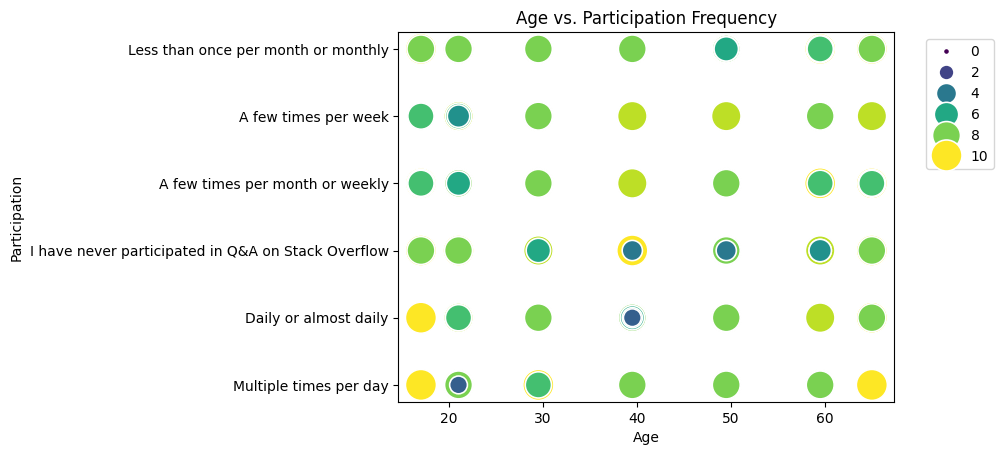

In [3]:
# Make a numeric column for Age
age_map = {'Under 18 years old': 17,
           '18-24 years old': 21, 
           '25-34 years old': 29.5, 
           '35-44 years old': 39.5, 
           '45-54 years old': 49.5,
           '55-64 years old': 59.5, 
           '65 years or older': 65}
# Apply map
df['Num_Age'] = df['Age'].map(age_map)

# Create a seperate dataframe
plot1_df = df[['Num_Age', 'Age', 'SOPartFreq', 'JobSat']].dropna().copy()

# Bubble Plot
sns.scatterplot(plot1_df, x='Num_Age', y='SOPartFreq', size='JobSat', sizes=(20,500), palette='viridis', hue='JobSat')

plt.title('Age vs. Participation Frequency')
plt.xlabel('Age')
plt.ylabel('Participation')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Bubble Plot for Compensation vs. Job Satisfaction

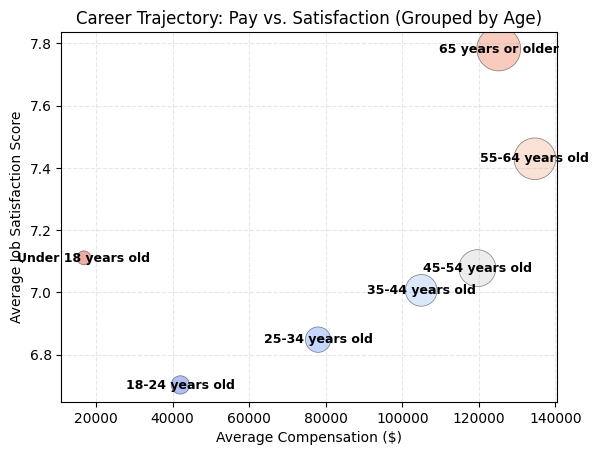

In [4]:
# Create seperate DataFrame
plot2_df = df[['ConvertedCompYearly', 'JobSat', 'Num_Age', 'Age']].dropna().copy()
group_plot2 = plot2_df.groupby(['Age'], as_index=False).agg(
    avg_pay = ('ConvertedCompYearly', 'mean'),
    avg_sat = ('JobSat', 'mean'),
    avg_age = ('Num_Age', 'mean')
)

# Bubble Plot
sns.scatterplot(group_plot2, x='avg_pay', y='avg_sat', 
                size='avg_age', sizes=(100, 1000), palette='coolwarm', 
                hue='Age', alpha=0.5, edgecolor='black', linewidth=0.5, legend=False)

# Add labels direcly to bubbles
for i in range(group_plot2.shape[0]):
    plt.text(
        group_plot2.avg_pay.iloc[i],
        group_plot2.avg_sat.iloc[i],
        group_plot2.Age.iloc[i],
        fontsize=9,
        ha='center', va='center', weight='bold' # Center text inside bubble
    )

plt.title('Career Trajectory: Pay vs. Satisfaction (Grouped by Age)')
plt.xlabel('Average Compensation ($)')
plt.ylabel('Average Job Satisfaction Score')

#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, linestyle='--')

plt.show()

---

#### ANALYZING RELATIONSHIP USING BUBBLE PLOTS

Bubble Plot of Technology Preferences by Age

In [5]:
# Fix Age category order
age_order = ['Under 18 years old','18-24 years old', '25-34 years old', 
             '35-44 years old', '45-54 years old', '55-64 years old',
             '65 years or older', 'Prefer not to say']


df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

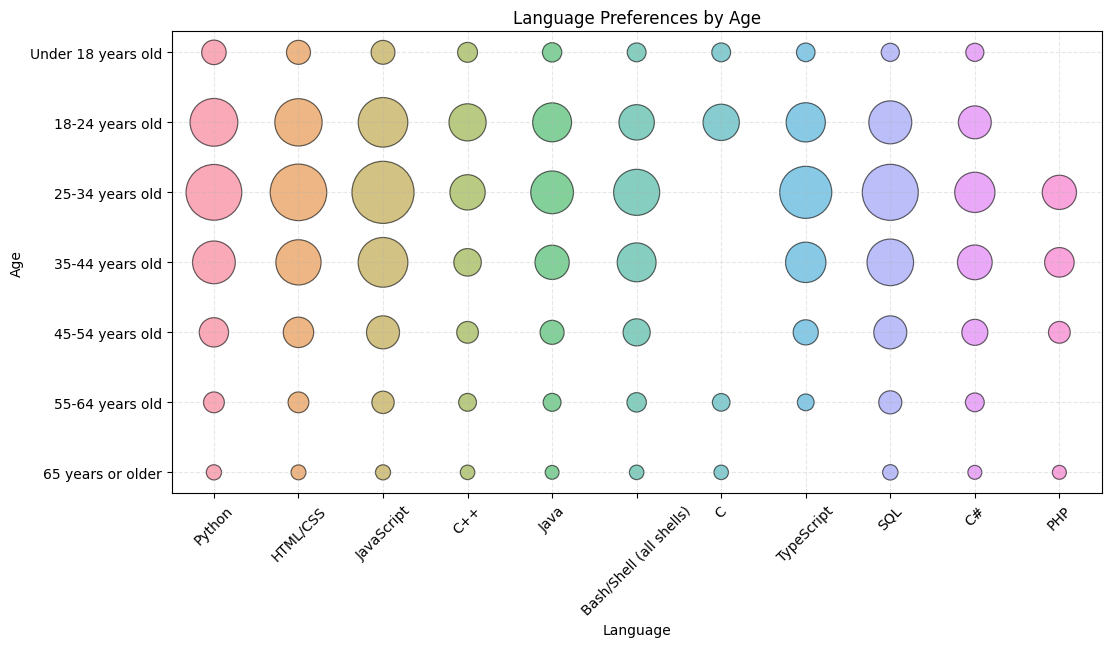

In [6]:
# Filter the data
lang_age = df[df['Age'] != 'Prefer not to say'][['Age', 'LanguageHaveWorkedWith', 'Num_Age']].dropna().copy()

# Fix language values
lang_age['Language'] = lang_age['LanguageHaveWorkedWith'].str.split(';')
clean_lang = lang_age.explode('Language')

# Aggeragate
grouped = clean_lang.groupby(['Age', 'Num_Age', 'Language'], observed=True).size().reset_index(name='count')

grouped = grouped.sort_values(['Age', 'count'], ascending=[True, False])

top_lang = grouped.groupby('Age', observed=True).head(10)

# Bubble plot
plt.figure(figsize=(12,6))
sns.scatterplot(top_lang, x='Language', y='Age', size='count', 
                hue='Language', sizes=(100, 2000), alpha=0.6,
                edgecolor='black', legend=False)

plt.title('Language Preferences by Age')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()

Bubble Plot for Preferred Database vs. Job Satisfaction

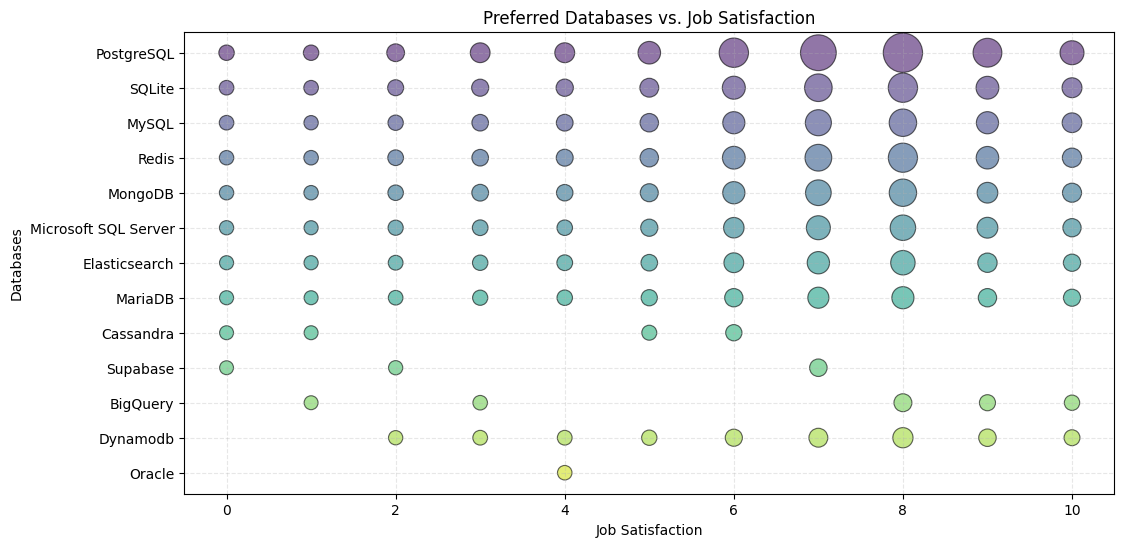

In [22]:
# Select Data
db_sat = df[['DatabaseWantToWorkWith', 'JobSat']].dropna().copy()

# Fix database column data
db_sat['Database'] = db_sat['DatabaseWantToWorkWith'].str.split(';')
database_sat = db_sat.explode('Database')

# Group the data
grouped = database_sat.groupby(['JobSat', 'Database']).size().reset_index(name='count').sort_values(['JobSat', 'count'], ascending=[True, False])

# Pick top 10 database by respondent count
top_db = grouped.groupby('JobSat').head(10)

# Bubble Plot
plt.figure(figsize=(12,6))
sns.scatterplot(top_db, x='JobSat', y='Database', size='count',
                hue='Database', sizes=(100,800), legend=False,
                edgecolor='black', alpha=0.6, palette='viridis')

plt.title('Preferred Databases vs. Job Satisfaction')
plt.ylabel('Databases')
plt.xlabel('Job Satisfaction')

plt.grid(True, alpha=0.3, linestyle='--')

plt.show()

---

#### COMPARING DATA USING BUBBLE PLOTS

Bubble Plot for Compensation Across Developer Roles

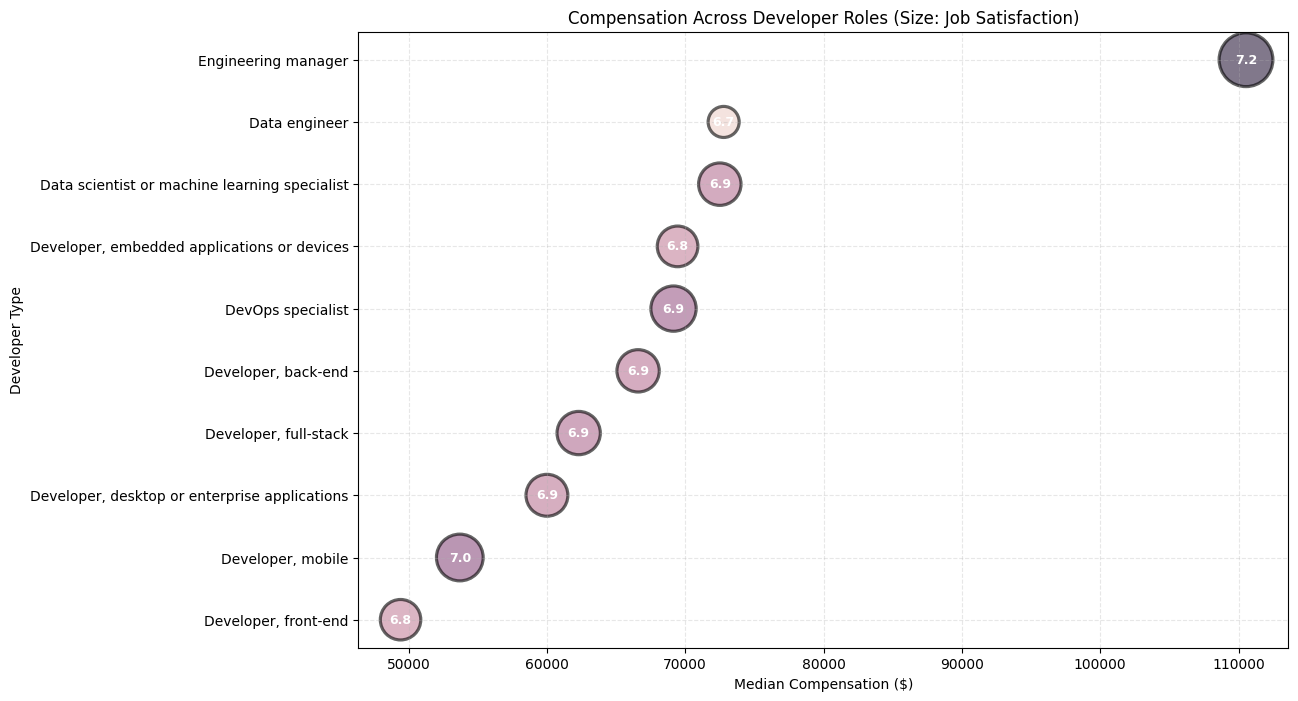

In [79]:
comp_dev_sat = df[df['DevType'] != 'Other (please specify):'][['ConvertedCompYearly', 'DevType', 'JobSat']].dropna().copy()

role_count = comp_dev_sat['DevType'].value_counts()

plot_df = comp_dev_sat[(comp_dev_sat['ConvertedCompYearly'] < 300000) &
                       (comp_dev_sat['DevType'].isin(role_count.nlargest(10).index))].groupby('DevType').agg(
                           median_comp = ('ConvertedCompYearly', 'median'),
                           avg_satisfaction = ('JobSat', 'mean'),
                           role_count = ('DevType', 'count')
                       ).sort_values('median_comp', ascending=False).reset_index()


plt.figure(figsize=(12,8))
sns.scatterplot(plot_df, x='median_comp', y='DevType', size='avg_satisfaction',
                sizes=(500,1500), hue='avg_satisfaction', edgecolor='black',
                alpha=0.6, legend=False)

plt.title('Compensation Across Developer Roles (Size: Job Satisfaction)')
plt.xlabel('Median Compensation ($)')
plt.ylabel('Developer Type')
plt.grid(True, alpha=0.3, linestyle='--')
#plt.legend(title='Avg Satisfaction',bbox_to_anchor=(1.05, 1), loc='upper left')

# Add label
for i in range(len(plot_df)):
    plt.text(
        plot_df.median_comp.iloc[i],
        plot_df.DevType.iloc[i],
        f"{plot_df.avg_satisfaction.iloc[i]:.1f}",
        ha='center', va='center', color='white', weight='bold', fontsize=9
    )

plt.show()

Bubble Plot for Collaboration Tools by Age

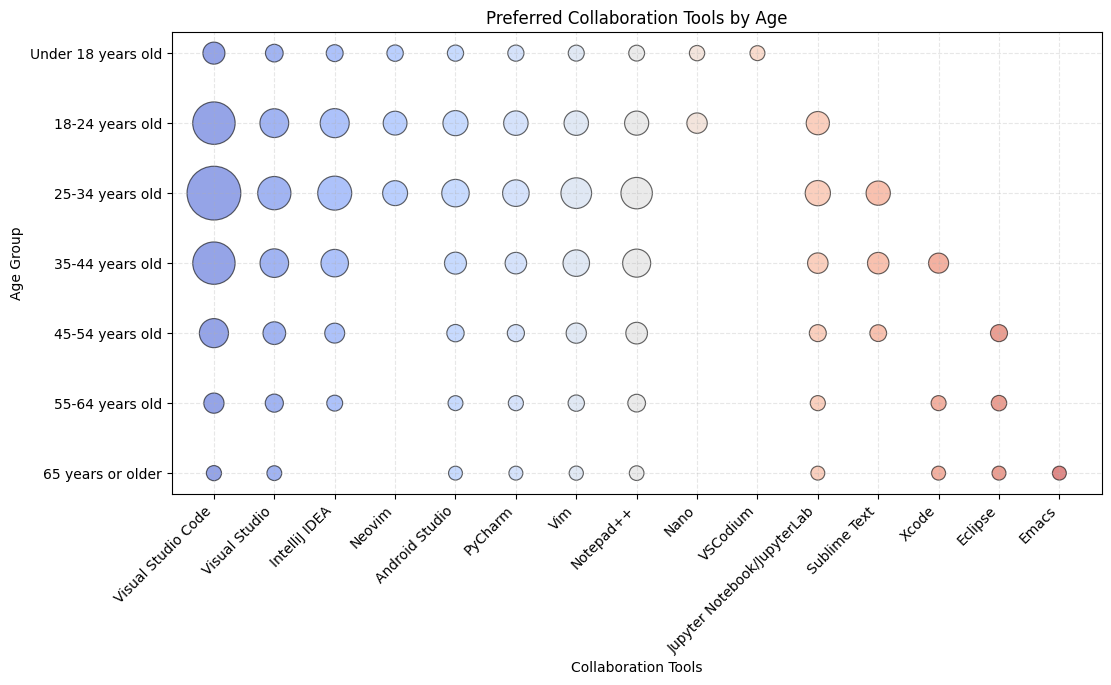

In [101]:
# Select the data
tool_age = df[df['Age'] != 'Prefer not to say'][['NEWCollabToolsHaveWorkedWith', 'Age', 'Num_Age']].dropna().copy()

# Fix Tools column values
tool_age['Tool'] = tool_age['NEWCollabToolsHaveWorkedWith'].str.split(';')
clean_tool = tool_age.explode('Tool')

# Count size for each tools
plot_df = (clean_tool.groupby(['Age', 'Num_Age', 'Tool'], observed=True)
           .size().reset_index(name='count')
           .sort_values(['Num_Age', 'count'], ascending=[True, False]))

# Pick top 10 for each age groups
plot_df = plot_df.groupby('Age', observed=True).head(10)

# Bubble Plot
plt.figure(figsize=(12,6))
sns.scatterplot(plot_df, x='Tool', y='Age', size='count', sizes=(100,1500),
                hue='Tool', edgecolor='black', alpha=0.6,
                legend=False, palette='coolwarm')
plt.title("Preferred Collaboration Tools by Age")
plt.xlabel("Collaboration Tools")
plt.ylabel("Age Group")
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(rotation=45, ha='right')

plt.show()

---

#### VISUALIZING TECHNOLOGY TRENDS USING BUBBLE PLOTS

Bubble Plot for Preferred Web Frameworks vs. Job Satisfaction

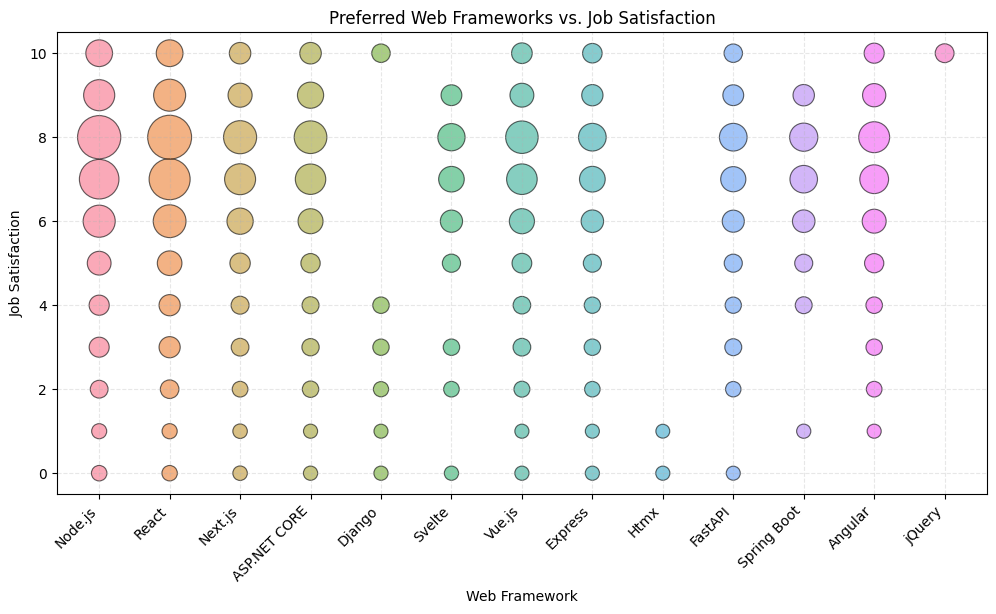

In [107]:
# Select data
fr_sat = df[['WebframeWantToWorkWith', 'JobSat']].dropna().copy()

# Fix Web Framework values
fr_sat['web_framework'] = fr_sat['WebframeWantToWorkWith'].str.split(';')
framework_sat = fr_sat.explode('web_framework')

# Count values of web_framework and pick top 10 framework
plot_df = (framework_sat.groupby(['JobSat', 'web_framework'])
           .size()
           .reset_index(name='count')
           .sort_values(['JobSat', 'count'], ascending=(True, False)))

plot_df = plot_df.groupby('JobSat').head(10)

# Bubble Plot
plt.figure(figsize=(12,6))
sns.scatterplot(plot_df, x='web_framework', y='JobSat', size='count',
                 sizes=(100, 1000), edgecolor='black', alpha=0.6,
                 hue='web_framework', legend=False)

plt.title("Preferred Web Frameworks vs. Job Satisfaction")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Web Framework')
plt.ylabel('Job Satisfaction')
plt.grid(True, linestyle='--', alpha=0.3)

plt.show()

Bubble Plot for Admired Technologies Across Countries

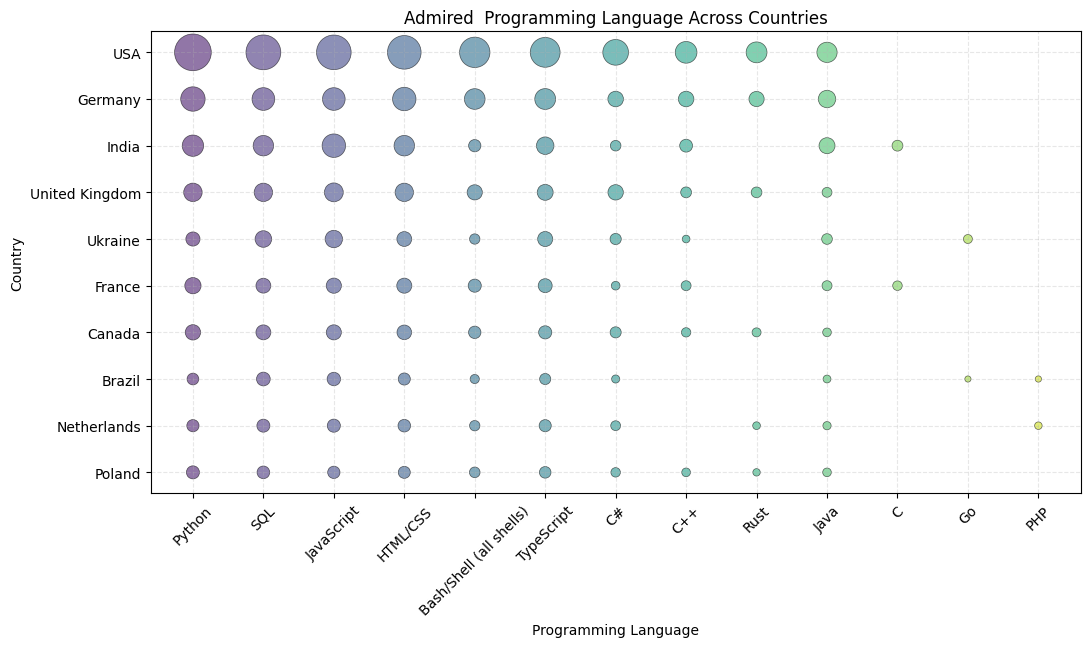

In [143]:
# Select Data
lang_country = df[['LanguageAdmired', 'Country']].dropna().copy()

# Fix Language column values
lang_country['Language'] = lang_country['LanguageAdmired'].str.split(';')
lang_data = lang_country.explode('Language')

# Filter top 10 country based on total respondents
top_country = lang_data['Country'].value_counts()

# Count frequency of language and select top 10 language for each country
lang_count = (lang_data[lang_data['Country'].isin(top_country.nlargest(10).index)]
              .groupby(['Country', 'Language'])
              .size()
              .reset_index(name='count')
              .sort_values('count', ascending=False))

plot_df = lang_count.groupby('Country').head(10).copy()

# Fix country names (shorten it)
short_cnames = {
    'United States of America' : 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'
}

plot_df['Country'] = plot_df['Country'].replace(short_cnames)

# Bubble Plot
plt.figure(figsize=(12,6))
sns.scatterplot(plot_df, x='Language', y='Country', size='count', 
                sizes=(20,700), edgecolor='black', alpha=0.6,
                legend=False, palette='viridis', hue='Language')

plt.title("Admired  Programming Language Across Countries")
plt.xlabel('Programming Language')

plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, linestyle='--')

plt.show()

---

In [144]:
conn.close()

---

#### **Summary**

- Create and interpret bubble plots to analyze relationships and compositions within datasets.

- Use bubble plots to explore developer preferences, compensation trends, and satisfaction levels.

- Apply bubble plots to visualize complex relationships involving multiple dimensions effectively.